<a href="https://colab.research.google.com/github/atiq065-ai/British_Airways_virtual-internship/blob/main/British_Airways_virtual_internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...


ngratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...
...,...
995,✅ Trip Verified | London to St Petersburgh. H...
996,✅ Trip Verified | Sydney to London via Singap...
997,Not Verified | London to Johannesburg. Britis...
998,✅ Trip Verified | I have to say travelling in ...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,This time British Airways managed to get ev...
1,"The seats were excellent, with a feel of mu..."
2,After the nightmare of getting through trip...
3,Prior to boarding a gate agent seemed to pi...
4,I flew from Amsterdam to Las Vegas with a l...
...,...
995,London to St Petersburgh. Huge disappointmen...
996,Sydney to London via Singapore with British ...
997,London to Johannesburg. British Airways is o...
998,I have to say travelling in Club Europe is a ...


Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

Step 1: Cleaning the text

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,This time British Airways managed to get ev...,This time British Airways managed to get ever...
1,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...
2,After the nightmare of getting through trip...,After the nightmare of getting through triple...
3,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...
4,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...


Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Step 5: Obtaining the stem words

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
reviews

['✅ Trip Verified |\xa0 \xa0This time British Airways managed to get everything right. The price of the tickets was reasonable and the timing was perfect. Boarding was smooth and the seats were comfortable – easy reline to enable dozing and sufficient pitch to get in and out. The table was firm enough to allow the use of a small laptop and mouse. A pre-flight soft drink or Prosecco was offered and both the food and drink were more than sufficient. The best part was the cabin crew – two in PE and they were both extremely efficient, pleasant and witty. There was a good selection of movies and both the screen and the headset worked perfectly.',
 '✅ Trip Verified |   The seats were excellent, with a feel of much more room than the official seat pitch (I am 6ft 1in). We could sleep for a couple of hours (daytime flight), with the blinds down as they should be (no point booking a window seat in my view). I focus on seat quality much more than smiley faces and food (the food was middling, and

In [26]:
!pip install nltk
import nltk
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the missing resource

# Continue with the existing code
from nltk.corpus import wordnet #import wordnet
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,reviews,Cleaned Reviews,POS tagged
0,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag..."
1,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,..."
2,After the nightmare of getting through trip...,After the nightmare of getting through triple...,"[(nightmare, n), (getting, v), (triple, a), (s..."
3,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,..."
4,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ..."


In [27]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...
1,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...
2,After the nightmare of getting through trip...,After the nightmare of getting through triple...,"[(nightmare, n), (getting, v), (triple, a), (s...",nightmare get triple security Nairobi Airpor...
3,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...
4,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...


In [28]:
df[['reviews','Lemma']]

,reviews,Lemma
0,This time British Airways managed to get ev...,time British Airways manage get everything r...
1,"The seats were excellent, with a feel of mu...",seat excellent feel much room official seat ...
2,After the nightmare of getting through trip...,nightmare get triple security Nairobi Airpor...
3,Prior to boarding a gate agent seemed to pi...,Prior board gate agent seem pick elderly peo...
4,I flew from Amsterdam to Las Vegas with a l...,fly Amsterdam Las Vegas layover Heathrow Nov...
...,...,...
995,London to St Petersburgh. Huge disappointmen...,London St Petersburgh Huge disappointment BA...
996,Sydney to London via Singapore with British ...,Sydney London via Singapore British Airways ...
997,London to Johannesburg. British Airways is o...,London Johannesburg British Airways one comm...
998,I have to say travelling in Club Europe is a ...,say travel Club Europe waste money food good...


Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [29]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...,0.9831,Positive
1,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...,0.5719,Positive
2,After the nightmare of getting through trip...,After the nightmare of getting through triple...,"[(nightmare, n), (getting, v), (triple, a), (s...",nightmare get triple security Nairobi Airpor...,0.9674,Positive
3,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...,-0.6486,Negative
4,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...,-0.8458,Negative


In [31]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,460
Negative,426
Neutral,114


Visual Representation

([<matplotlib.patches.Wedge at 0x7a70c6d61890>,
 [Text(0.13786652831108215, 1.0913261750601648, 'Positive'),
  Text(-0.511666137747723, -0.9737544677598806, 'Negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'Neutral')],
 [Text(0.07519992453331752, 0.5952688227600899, '46.0%'),
  Text(-0.27909062058966705, -0.5311388005962985, '42.6%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

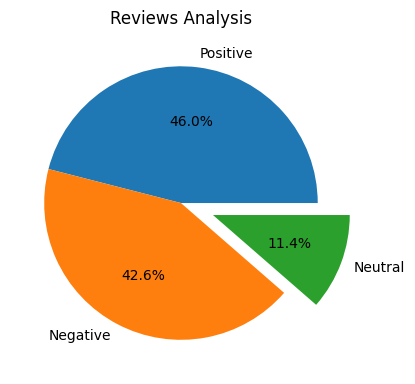

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [33]:
df.to_csv("BA_reviews.csv")

Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

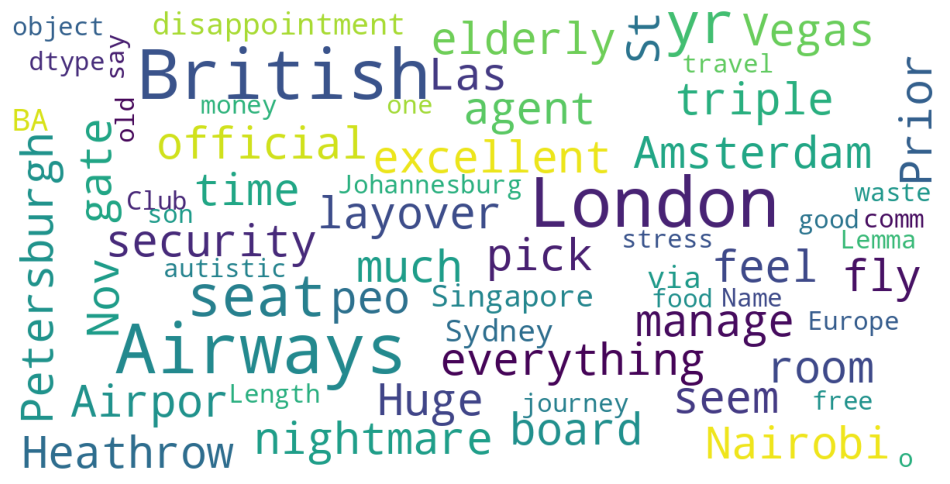

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)